In [1]:
import pandas as pd
import sys
sys.path.append("../scripts")
sys.path.append('../src')
from plots import plot_histogram, plot_boxplot, correlation_matrix
from preprocess import normalize_date, drop_column, find_outliers, IQR_outlier, find_and_replace_outliers_with_median

In [2]:
data = pd.read_csv('../data/raw/data.csv')
xls_data = pd.read_excel('../data/raw/data.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [4]:
xls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95660 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95660 non-null  float64
 7   ProviderId            95660 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95659 non-null  float64
 13  TransactionStartTime  95661 non-null  object 
 14  PricingStrategy       95659 non-null  float64
 15  FraudResult        

In [5]:
xls_data = drop_column(xls_data, ['Unnamed: 16', 'Unnamed: 17'])

### replace missing values with median

In [6]:
xls_data['Value'] = xls_data['Value'].fillna(xls_data['Value'].median())
xls_data['Amount'] = xls_data['Amount'].fillna(xls_data['Amount'].median())
xls_data['CountryCode'] = xls_data['CountryCode'].fillna(xls_data['CountryCode'].median())
xls_data['PricingStrategy'] = xls_data['PricingStrategy'].fillna(xls_data['PricingStrategy'].median())

### Replace missing Categorical data with Forward fill

In [7]:
xls_data['ProviderId'] = xls_data['ProviderId'].ffill()
xls_data['AccountId'] = xls_data['AccountId'].ffill()
xls_data['TransactionStartTime'] = xls_data['TransactionStartTime'].ffill()

In [8]:
normalize_date(data,'TransactionStartTime')
normalize_date(xls_data,'TransactionStartTime')
data['FraudResult'] = data['FraudResult'].astype('category')
xls_data['FraudResult'] = xls_data['FraudResult'].astype('category')
data['PricingStrategy'] = data['PricingStrategy'].astype('category')

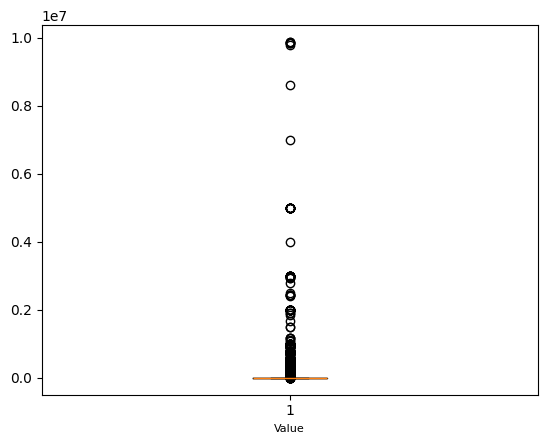

<Figure size 1000x700 with 0 Axes>

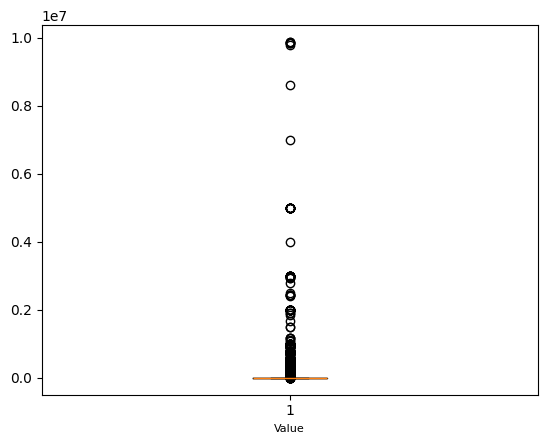

<Figure size 1000x700 with 0 Axes>

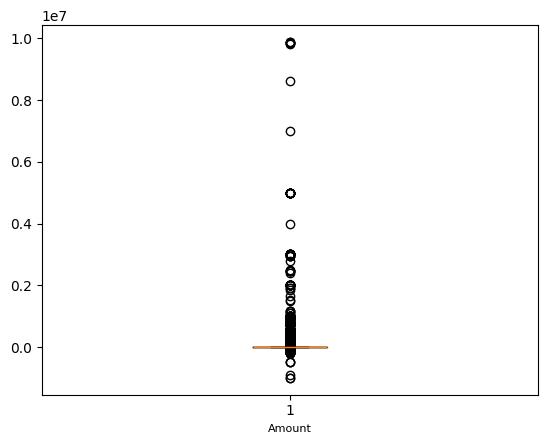

<Figure size 1000x700 with 0 Axes>

In [9]:
plot_boxplot(data, ['Value'])
plot_boxplot(xls_data, ['Value'])
plot_boxplot(data, ['Amount'])

In [10]:
data = IQR_outlier(data, [])

No outliers found in column 'CountryCode' using IQR method.
Found 24441 outliers in column 'Amount' using IQR method.
Found 9021 outliers in column 'Value' using IQR method.


In [11]:
find_outliers(data)

Found 374 outliers in column 'Amount'.
No outliers found in column 'Value' using z-score threshold 3.


['Amount']

In [12]:
data = find_and_replace_outliers_with_median(data, ['Value', 'Amount'], 2)

Processing columns: ['Value', 'Amount']
Found 10031 outliers in column 'Value'.
Median value for 'Value' (used for replacement): 1000.0
Outliers in column 'Value' replaced with median.
Found 9822 outliers in column 'Amount'.
Median value for 'Amount' (used for replacement): 1000.0
Outliers in column 'Amount' replaced with median.


### Distribution of numberical variables

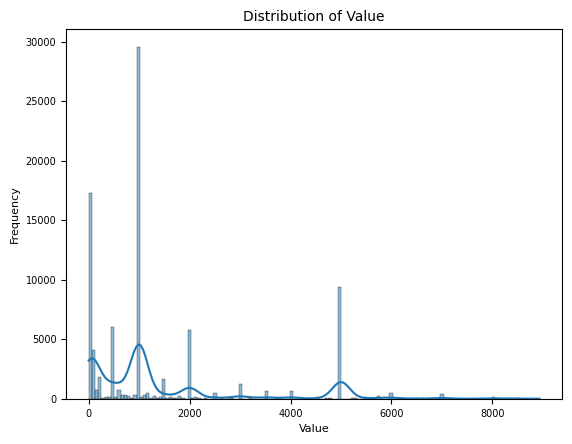

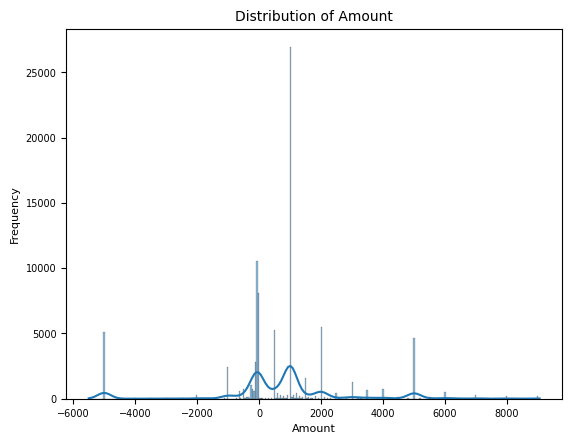

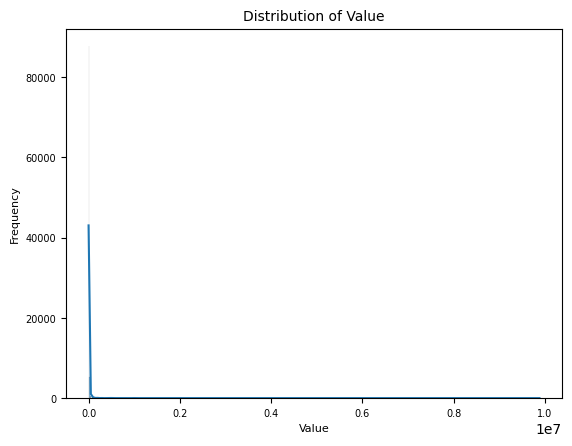

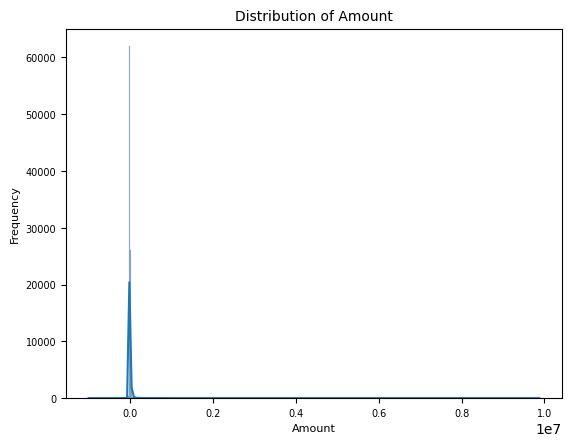

In [13]:
plot_histogram(data, ['Value', 'Amount'])
plot_histogram(xls_data, ['Value', 'Amount'])


### Distribution of Categorical variables

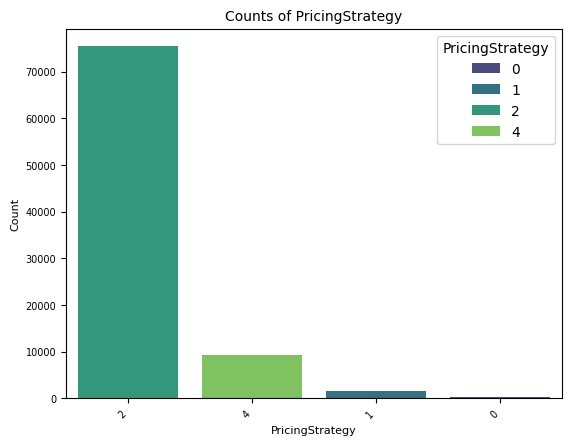

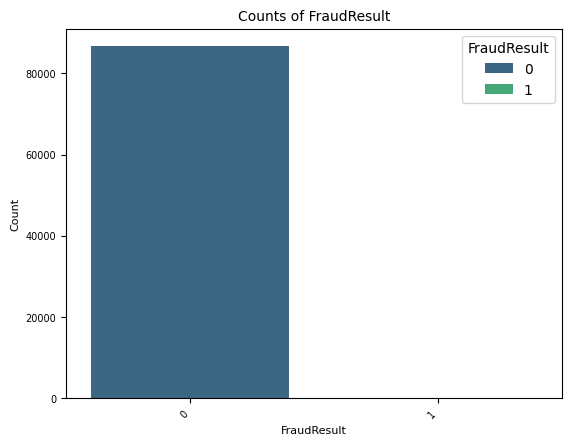

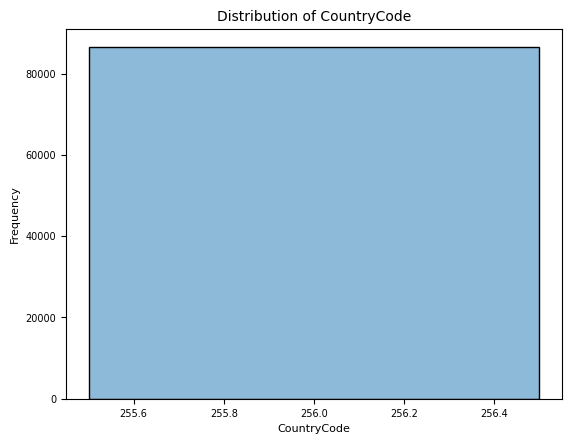

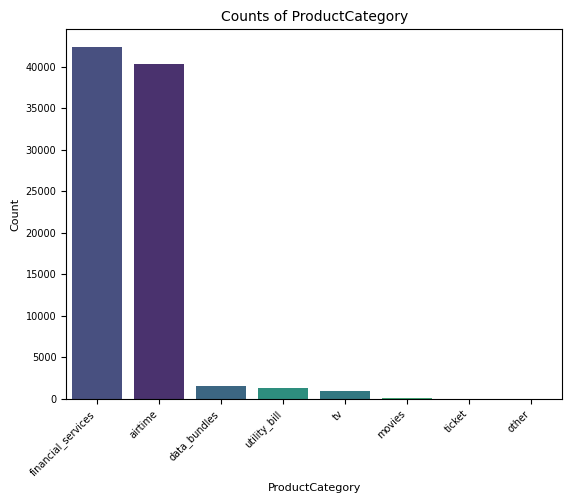

In [14]:
plot_histogram(data, ['PricingStrategy', 'FraudResult','CountryCode', 'ProductCategory'])


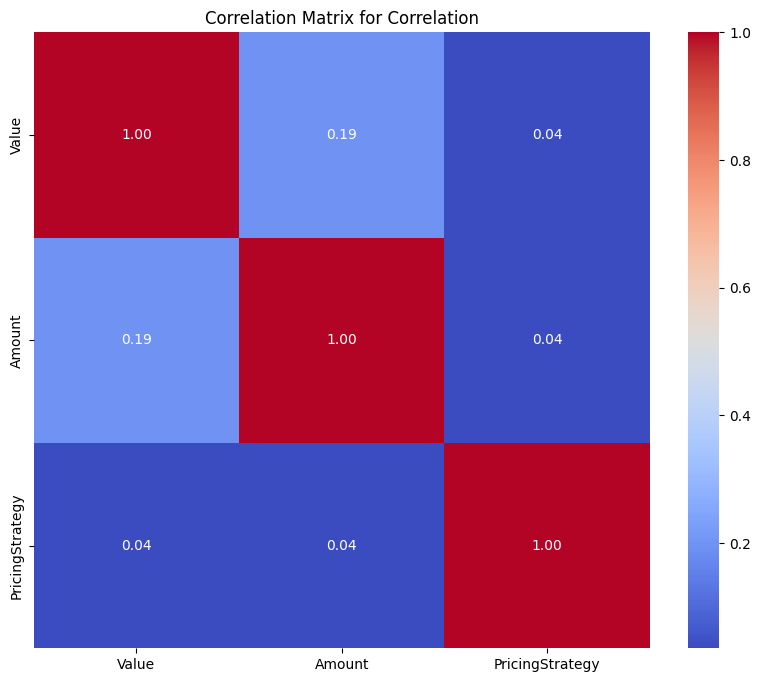

In [15]:
correlation_matrix(data, ['Value', 'Amount','PricingStrategy'], 'Correlation')

In [16]:
data.to_csv('../data/processed/data.csv')

In [17]:
data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [2]:
variables = pd.read_csv('../data/raw/Xente_Variable_Definitions.csv')

In [3]:
variables

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [3]:
data = pd.read_csv('../data/processed/data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86641 entries, 0 to 86640
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            86641 non-null  int64  
 1   TransactionId         86641 non-null  object 
 2   BatchId               86641 non-null  object 
 3   AccountId             86641 non-null  object 
 4   SubscriptionId        86641 non-null  object 
 5   CustomerId            86641 non-null  object 
 6   CurrencyCode          86641 non-null  object 
 7   CountryCode           86641 non-null  int64  
 8   ProviderId            86641 non-null  object 
 9   ProductId             86641 non-null  object 
 10  ProductCategory       86641 non-null  object 
 11  ChannelId             86641 non-null  object 
 12  Amount                86641 non-null  float64
 13  Value                 86641 non-null  int64  
 14  TransactionStartTime  86641 non-null  object 
 15  PricingStrategy    

In [4]:
from data_processed import feature_engineering_pipeline
feature_engineering_pipeline()

Original X_train head (before feature engineering):
       Unnamed: 0         TransactionId         BatchId       AccountId  \
58796       66158  TransactionId_123439  BatchId_118757  AccountId_3981   
53263       60310  TransactionId_102648  BatchId_116759  AccountId_4255   
33466       37572   TransactionId_99339  BatchId_106353   AccountId_986   
81459       90117    TransactionId_2816   BatchId_87263  AccountId_4739   
18960       21954   TransactionId_61640   BatchId_87972  AccountId_2682   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
58796   SubscriptionId_910  CustomerId_4431          UGX          256   
53263  SubscriptionId_3152  CustomerId_4708          UGX          256   
33466  SubscriptionId_2225  CustomerId_1335          UGX          256   
81459   SubscriptionId_633  CustomerId_5208          UGX          256   
18960  SubscriptionId_1382  CustomerId_3102          UGX          256   

         ProviderId     ProductId     ProductCategory    C

/home/mikiask/anotherproject/Credit-Risk-Probability-Model-for-Alternative-Data-week5/.venv/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


{'feature_processed_train':        Unnamed: 0         TransactionId         BatchId       AccountId  \
 58796       66158  TransactionId_123439  BatchId_118757  AccountId_3981   
 53263       60310  TransactionId_102648  BatchId_116759  AccountId_4255   
 33466       37572   TransactionId_99339  BatchId_106353   AccountId_986   
 81459       90117    TransactionId_2816   BatchId_87263  AccountId_4739   
 18960       21954   TransactionId_61640   BatchId_87972  AccountId_2682   
 ...           ...                   ...             ...             ...   
 6265         6681   TransactionId_64545   BatchId_15797  AccountId_1457   
 54886       62040   TransactionId_77184  BatchId_103480  AccountId_2990   
 76820       85196    TransactionId_8097   BatchId_97143  AccountId_4841   
 860           893   TransactionId_56860   BatchId_88233  AccountId_4115   
 15795       18591  TransactionId_136411   BatchId_80173  AccountId_4841   
 
             SubscriptionId       CustomerId CurrencyCode  

In [ ]:
print(data['ChannelId'].unique())
print(len(data['AccountId'].unique()))
print("="*50)
data_grouped = data.groupby(['CustomerId']).agg({
    'Value': 'sum',
    'Amount': 'sum',
   
})
print(data_grouped)

['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']
3440
                  Value   Amount
CustomerId                      
CustomerId_1       1000   1000.0
CustomerId_10      1000   1000.0
CustomerId_1001   12400   2000.0
CustomerId_1002    4775   4225.0
CustomerId_1003   14000   2000.0
...                 ...      ...
CustomerId_992    14000   2000.0
CustomerId_993    14000   2000.0
CustomerId_994   104877  35873.0
CustomerId_996    25000  13000.0
CustomerId_998    55000  -8000.0

[3575 rows x 2 columns]
